In [1]:
import soundfile as sf
import numpy as np
from phaunos_ml.utils.feature_utils import CorrelogramExtractor

/home/jul/.miniconda3/envs/phaunos_ml-python3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/jul/.miniconda3/envs/phaunos_ml-python3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# load audio file
audio_filename = 'data/corr_ex.wav'
audio, sr = sf.read(audio_filename)

In [4]:
audio.shape

(40960, 2)

In [5]:
sr

48000

In [6]:
# Configure CorrelogramExtractor
# Make sure corr_ex.example_duration is the same as the audio duration.
# If it is different, reset it.
config_file = 'data/correlogram_cfg.json'
corr_ex = CorrelogramExtractor.from_config(config_file)

In [7]:
corr_ex

phaunos_ml.utils.feature_utils.CorrelogramExtractor. Config: {'max_delay': 0.00044117647058823526, 'sr': 48000, 'n_fft': 1024, 'hop_length': 1024, 'example_duration': 0.8533333333333334, 'example_hop_duration': 0.8533333333333334, 'dtype': <class 'numpy.float32'>, 'ind_min': 490, 'ind_max': 533}

In [8]:
# Compute the correlogram
corr, _, __ = corr_ex.process(audio.T, sr)

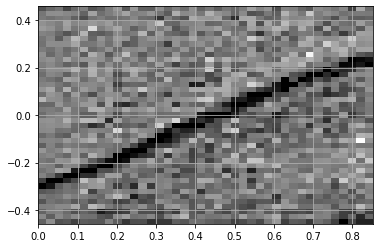

In [9]:
# Plot the correlogram
max_delay = ((corr_ex.n_fft / 2) - corr_ex.ind_min) / sr * 1000 # in ms
plt.imshow(corr[0][0], extent=[0, corr_ex.example_duration, -max_delay, max_delay], aspect='auto', cmap='gray_r')
plt.grid()